In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def global_thresholding(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.medianBlur(img,5)
  ret, output = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  return output

In [3]:
def Otsu(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.medianBlur(img,5)
  ret, output = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return output

In [4]:
def adaptive_thresholding(img, adaptive_method, block_size, C):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = cv2.medianBlur(img,5)
  output = cv2.adaptiveThreshold(img,255,adaptive_method,\
            cv2.THRESH_BINARY,block_size,C)
  return output

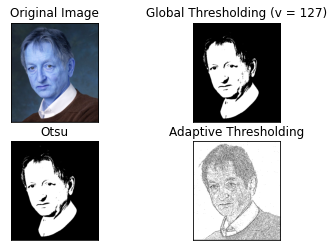

In [5]:
img_path = 'hinton.jpg'
img = cv2.imread(img_path)
glb_th = global_thresholding(img)
otsu_th = Otsu(img)
adp_th = adaptive_thresholding(img, cv2.ADAPTIVE_THRESH_MEAN_C, 3, 3)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Otsu', 'Adaptive Thresholding']
images = [img, glb_th, otsu_th, adp_th]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [6]:
cv2.imwrite('binary.jpg', otsu_th)

True

In [7]:
def dfs_v1(img, seed):
    directions = [(-1, -1),(-1, 0),(-1, +1),(0, -1),(0, +1), (+1, -1), (+1, 0), (+1, +1)]
    img_copy = img.copy()
    img_copy[seed[0], seed[1]] = np.array([0,0,255])
    queue = [seed]
    
    while len(queue) != 0:
        v = queue.pop(0)
        for d in directions:
            u = (v[0] + d[0], v[1] + d[1])
            if(u[0] < 0 or u[1] < 0 or u[0] > img_copy.shape[0] - 1 or u[1] > img_copy.shape[1] - 1):
                continue
            if(np.array_equal(img_copy[u[0], u[1]], np.array([0,0,255]))):
                continue
            if((np.abs(img[seed[0],seed[1]] - img[u[0], u[1]]) < 5).all()):
                img_copy[u[0], u[1]] = np.array([0,0,255])
                queue = [u] + queue
    return img_copy

def regionGrowth_v1(event, x, y, flags, param):
#     global img, img_copy
    img_copy = param.copy()
    if event == cv2.EVENT_LBUTTONDBLCLK:
        
        seed = (y,x)
        img_copy = dfs_v1(img_copy, seed)
        
        plt.imshow(img_copy, vmin=0, vmax=255)
        plt.show()
    return img_copy
def reg_v1(image):
    cv2.namedWindow('Image')
    param = image
    cv2.setMouseCallback('Image', regionGrowth_v1, param)
#     img = cv2.imread(img_path)
#     img_copy = img.copy()
    while(1):
        cv2.imshow('Image', param)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:
            break

    cv2.destroyAllWindows()
   

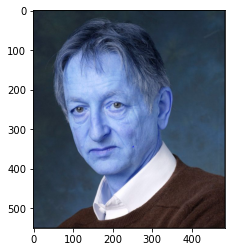

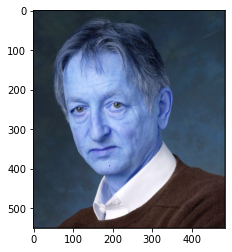

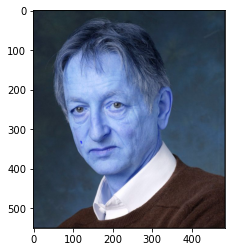

In [ ]:
img = cv2.imread(img_path)
reg_v1(img)   

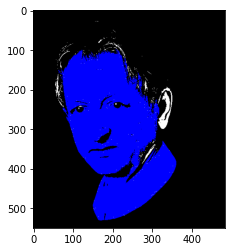

In [ ]:
img = cv2.imread('binary.jpg')
reg_v1(img)

In [7]:
def dfs_v2(img, seed):
    directions = [(-1, -1),(-1, 0),(-1, +1),(0, -1),(0, +1), (+1, -1), (+1, 0), (+1, +1)]
    img_copy = img.copy()
    img_copy[seed[0], seed[1]] = np.array([0,0,255])
    queue = [seed]
    
    while len(queue) != 0:
        v = queue.pop(0)
        for d in directions:
            u = (v[0] + d[0], v[1] + d[1])
            if(u[0] < 0 or u[1] < 0 or u[0] > img_copy.shape[0] - 1 or u[1] > img_copy.shape[1] - 1):
                continue
            if(np.array_equal(img_copy[u[0], u[1]], np.array([0,0,255]))):
                continue
            if((np.abs(img[v[0],v[1]] - img[u[0], u[1]]) < 5).all()):
                img_copy[u[0], u[1]] = np.array([0,0,255])
                queue = [u] + queue
    return img_copy

def regionGrowth_v2(event, x, y, flags, param):
#     global img, img_copy
    img_copy = param.copy()
    if event == cv2.EVENT_LBUTTONDBLCLK:
        
        seed = (y,x)
        img_copy = dfs_v2(img_copy, seed)
        
        plt.imshow(img_copy, vmin=0, vmax=255)
        plt.show()
    return img_copy
def reg_v2(image):
    cv2.namedWindow('Image')
    param = image
    cv2.setMouseCallback('Image', regionGrowth_v2, param)
#     img = cv2.imread(img_path)
#     img_copy = img.copy()
    while(1):
        cv2.imshow('Image', param)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:
            break

    cv2.destroyAllWindows()
   

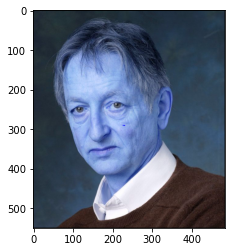

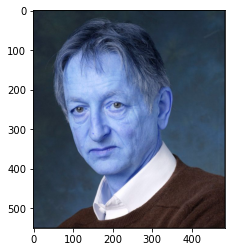

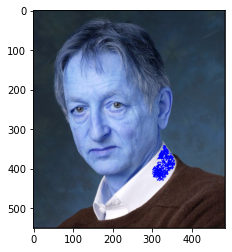

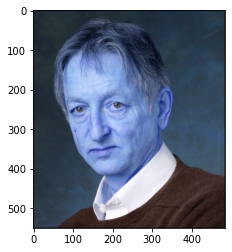

In [ ]:
img = cv2.imread(img_path)
reg_v2(img)   

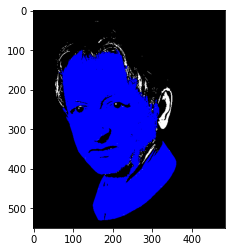

In [ ]:
img = cv2.imread('binary.jpg')
reg_v2(img)